# Biography-Based Race Classifier Explainability

In addition to Ablation, we look at several other factors that could have affected our biography-based race classifier's performance.

- famousness index
- word count

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

root_dir = "/content/drive/MyDrive/Undergrad/Summer 2023/Race Classification/biography" # jw10

prob_df = pd.read_csv(f"{root_dir}/BioRaceBERT-final.csv")
print(f"This dataframe has {len(prob_df)} people")
prob_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
This dataframe has 5201 people


,index,name,href,race,race_cat,role,image,bio,Asian,Black,Hispanic,White,pred,pred_cat
0,0,Ang Lee,/name/nm0000487,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BODA2MT...,"Born in 1954 in Pingtung, Taiwan, Ang Lee has ...",0.998528,0.000619,0.000518,0.000335,Asian,0
1,1,James Wan,/name/nm1490123,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMTY5Nz...,James Wan (born 26 February 1977) is an Austra...,0.999404,0.000226,0.000254,0.000116,Asian,0
2,2,Jon M. Chu,/name/nm0160840,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BNDM0Nj...,Jon is an alumni of the USC School of Cinema-T...,0.786494,0.032934,0.010506,0.170067,Asian,0
3,3,Taika Waititi,/name/nm0169806,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMzk4MD...,"Taika Waititi, also known as Taika Cohen, hail...",0.997836,0.000499,0.000410,0.001255,Asian,0
4,4,Karyn Kusama,/name/nm0476201,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMTUzMT...,"Karyn Kusama was born on March 21, 1968 in Bro...",0.897697,0.055229,0.026547,0.020527,Asian,0


## Famousness Index

We want to generate four graphs, one for each race category. The x-axis is Famousness Index (FI) and the y-axis is P(race|race), which means the y-axis requires us to get the probabilities of each race category.

In [5]:
famous = pd.read_csv("finalResult_celeb.csv")
famous2 = pd.read_csv("finalResult_quotations2.csv")

famous = famous[["href", "famousness"]]
famous2 = famous2[["href", "famousness"]]

famous = prob_df.merge(famous, how="inner", on="href")
famous2 = prob_df.merge(famous2, how="inner", on="href")
print(f"These dataframes have {len(famous)}, {len(famous2)} people")

These dataframes have 5201, 5201 people


In [6]:
from sklearn.preprocessing import quantile_transform

famous["log_famous_index"] = famous["famousness"].apply(lambda x: np.log(int(x.replace(",", ""))))
famous["famous_index"] = famous["famousness"].apply(lambda x: (int(x.replace(",", ""))/100))
famous["invexp_famous_index"] = famous["famousness"].apply(lambda x: np.power(int(x.replace(",", "")), 0.5))

In [7]:
famous.head()

,index,name,href,race,race_cat,role,image,bio,Asian,Black,Hispanic,White,pred,pred_cat,famousness,log_famous_index,famous_index,invexp_famous_index
0,0,Ang Lee,/name/nm0000487,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BODA2MT...,"Born in 1954 in Pingtung, Taiwan, Ang Lee has ...",0.998528,0.000619,0.000518,0.000335,Asian,0,"16,300,000",16.606676,163000.0,4037.325848
1,1,James Wan,/name/nm1490123,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMTY5Nz...,James Wan (born 26 February 1977) is an Austra...,0.999404,0.000226,0.000254,0.000116,Asian,0,"11,300,000",16.240313,113000.0,3361.547263
2,2,Jon M. Chu,/name/nm0160840,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BNDM0Nj...,Jon is an alumni of the USC School of Cinema-T...,0.786494,0.032934,0.010506,0.170067,Asian,0,"4,550,000",15.330638,45500.0,2133.072901
3,3,Taika Waititi,/name/nm0169806,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMzk4MD...,"Taika Waititi, also known as Taika Cohen, hail...",0.997836,0.000499,0.000410,0.001255,Asian,0,"986,000",13.801412,9860.0,992.975327
4,4,Karyn Kusama,/name/nm0476201,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMTUzMT...,"Karyn Kusama was born on March 21, 1968 in Bro...",0.897697,0.055229,0.026547,0.020527,Asian,0,"329,000",12.703813,3290.0,573.585216


## Generate graphs

In [8]:
groups = famous.groupby("race")

groups["famous_index"].max()


race
Asian       3220000.0
Black       8330000.0
Hispanic    1330000.0
White       2000000.0
Name: famous_index, dtype: float64

In [9]:
from matplotlib.lines import Line2D

def create_famousness_graph(in_col="famous_index", title="Famousness Index"):
  groups = famous.groupby("race")

  # Create subplots for each race
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
  fig.suptitle(f"Scatter Plots of Probability vs. {title} by Race")

  # Define a color map, marker styles for the points based on the "pred" column

  colors = {"match": "green", "mismatch": "red"}
  markers = {"match": "o", "mismatch": "x"}

  # Create a list to store legend handles and labels
  legend_handles = []

  # Iterate over each race and create a scatter plot
  for i, (name, group) in enumerate(groups):
      ax = axes[i // 2, i % 2]

      for condition in ["match", "mismatch"]:
          subset = group[group["pred"] == name if condition == "match" else group["pred"] != name]
          scatter = ax.scatter(
              subset[in_col],
              subset[name],
              alpha=0.5,
              c=colors[condition],
              marker=markers[condition]
              # label=f"{name} ({condition})"
          )

      ax.set_title(f"P({name}) vs. {title}")
      ax.set_xlabel(f"{title}")
      ax.set_ylabel(f"P({name}|{name})")
      ax.grid(True)
      legend_labels = ["Match", "Mismatch"]


      # Store the legend handles for this subplot
      legend_handles.extend([Line2D([0], [0], marker=markers["match"], color=colors["match"], label="Match"),
                            Line2D([0], [0], marker=markers["mismatch"], color=colors["mismatch"], label="Mismatch")])

  # Create a single legend outside of the subplots
  fig.legend(handles=legend_handles, labels=legend_labels, loc="upper right")


  # Adjust layout and show plots
  plt.tight_layout()
  plt.subplots_adjust(top=0.85)
  plt.show()

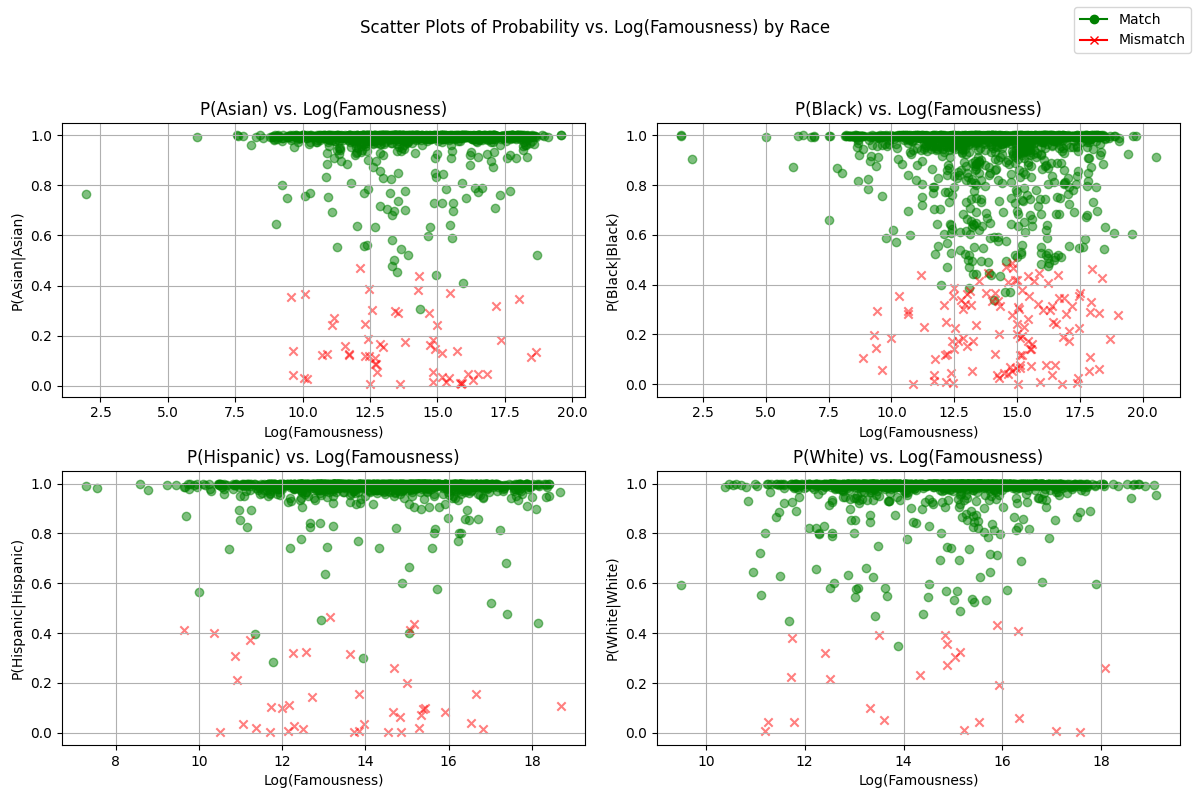

In [10]:
create_famousness_graph(in_col="log_famous_index", title="Log(Famousness)")

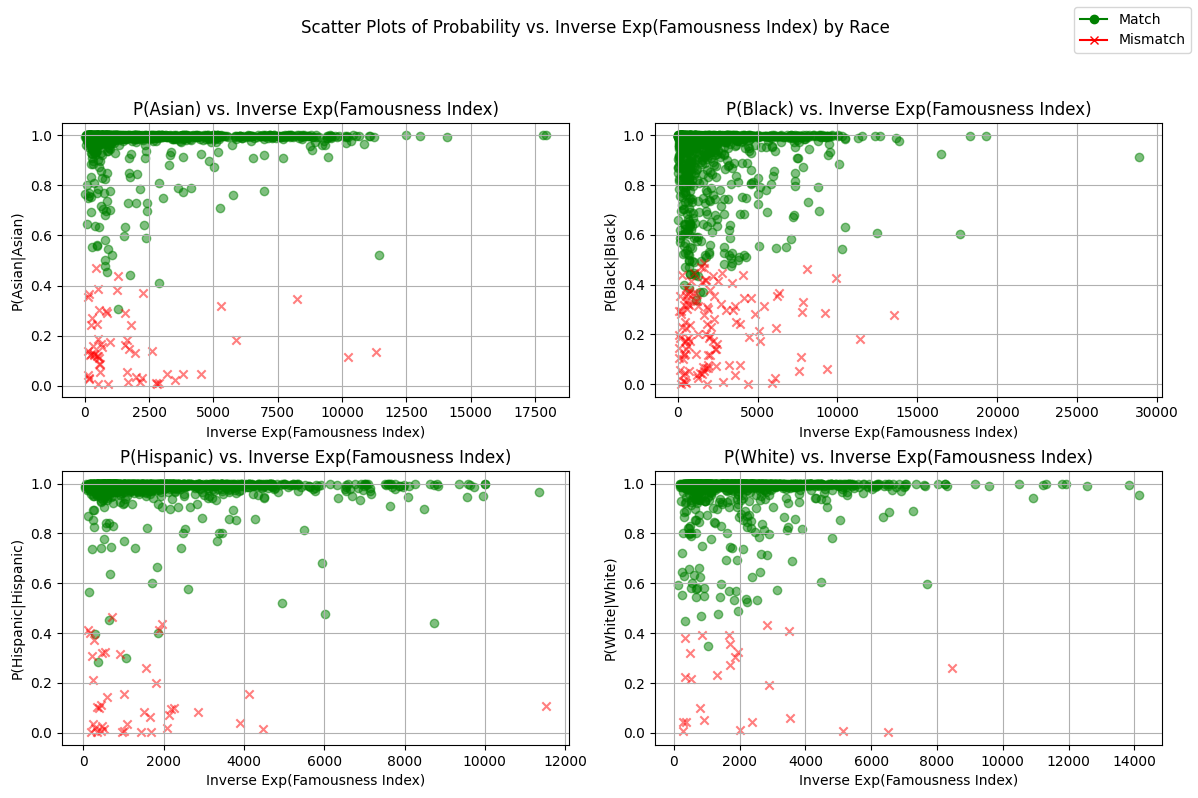

In [11]:
create_famousness_graph(in_col="invexp_famous_index", title="Inverse Exp(Famousness Index)")

## Word Count

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

root_dir = "/content/drive/MyDrive/Undergrad/Summer 2023/Race Classification/biography" # jw10

prob_df = pd.read_csv(f"{root_dir}/BioRaceBERT-final.csv")
print(f"This dataframe has {len(prob_df)} people")
prob_df["word_count"] = prob_df["bio"].astype(str).apply(lambda x: len(x.split()))
prob_df["log_word_count"] = prob_df["bio"].astype(str).apply(lambda x: np.log(len(x.split())))
prob_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
This dataframe has 5201 people


,index,name,href,race,race_cat,role,image,bio,Asian,Black,Hispanic,White,pred,pred_cat,word_count,log_word_count
0,0,Ang Lee,/name/nm0000487,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BODA2MT...,"Born in 1954 in Pingtung, Taiwan, Ang Lee has ...",0.998528,0.000619,0.000518,0.000335,Asian,0,487,6.188264
1,1,James Wan,/name/nm1490123,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMTY5Nz...,James Wan (born 26 February 1977) is an Austra...,0.999404,0.000226,0.000254,0.000116,Asian,0,307,5.726848
2,2,Jon M. Chu,/name/nm0160840,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BNDM0Nj...,Jon is an alumni of the USC School of Cinema-T...,0.786494,0.032934,0.010506,0.170067,Asian,0,67,4.204693
3,3,Taika Waititi,/name/nm0169806,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMzk4MD...,"Taika Waititi, also known as Taika Cohen, hail...",0.997836,0.000499,0.000410,0.001255,Asian,0,259,5.556828
4,4,Karyn Kusama,/name/nm0476201,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMTUzMT...,"Karyn Kusama was born on March 21, 1968 in Bro...",0.897697,0.055229,0.026547,0.020527,Asian,0,43,3.761200


In [13]:
from matplotlib.lines import Line2D

def create_famousness_graph(df, in_col="word_count", title="Word Count"):
  groups = df.groupby("race")

  # Create subplots for each race
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
  fig.suptitle(f"Scatter Plots of Probability vs. {title} by Race")

  # Define a color map, marker styles for the points based on the "pred" column

  colors = {"match": "green", "mismatch": "red"}
  markers = {"match": "o", "mismatch": "x"}

  # Create a list to store legend handles and labels
  legend_handles = []

  # Iterate over each race and create a scatter plot
  for i, (name, group) in enumerate(groups):
      ax = axes[i // 2, i % 2]

      for condition in ["match", "mismatch"]:
          subset = group[group["pred"] == name if condition == "match" else group["pred"] != name]
          scatter = ax.scatter(
              subset[in_col],
              subset[name],
              alpha=0.5,
              c=colors[condition],
              marker=markers[condition]
              # label=f"{name} ({condition})"
          )

      ax.set_title(f"P({name}) vs. {title}")
      ax.set_xlabel(f"{title}")
      ax.set_ylabel(f"P({name}|{name})")
      ax.grid(True)
      legend_labels = ["Match", "Mismatch"]


      # Store the legend handles for this subplot
      legend_handles.extend([Line2D([0], [0], marker=markers["match"], color=colors["match"], label="Match"),
                            Line2D([0], [0], marker=markers["mismatch"], color=colors["mismatch"], label="Mismatch")])

  # Create a single legend outside of the subplots
  fig.legend(handles=legend_handles, labels=legend_labels, loc="upper right")


  # Adjust layout and show plots
  plt.tight_layout()
  plt.subplots_adjust(top=0.85)
  plt.show()

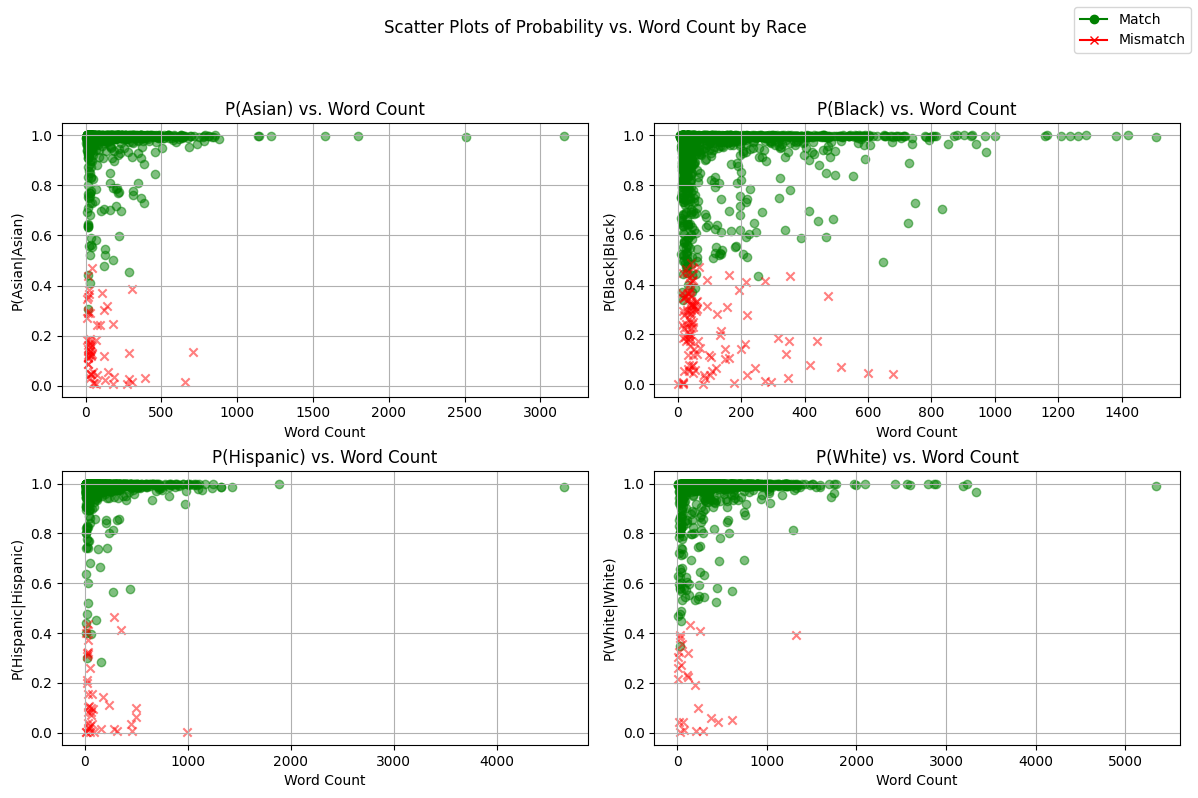

In [14]:
create_famousness_graph(prob_df, in_col="word_count", title="Word Count")

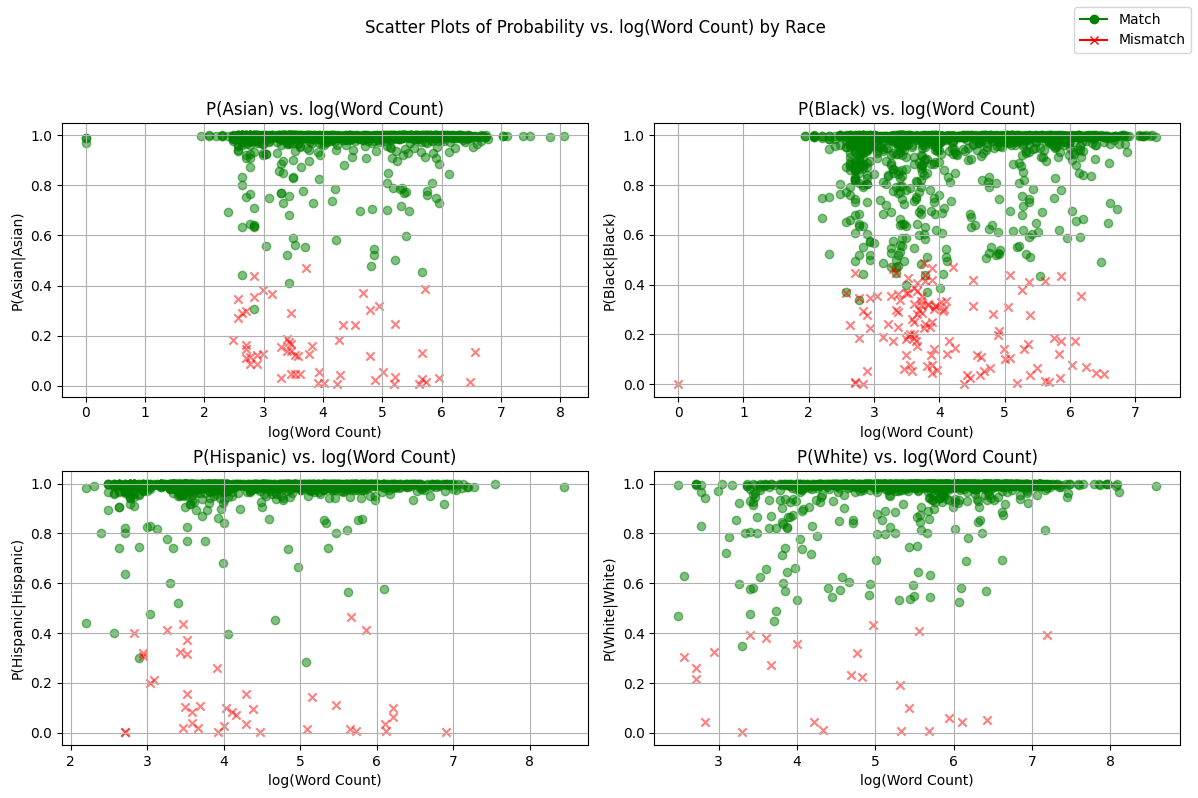

In [15]:
create_famousness_graph(prob_df, in_col="log_word_count", title="log(Word Count)")

# how to go about doing famousness analysis?

# the people it got wrong were in XYZ percentiles of famousness
famousness index as y axis (log scale), percentiles of buckets

# word count affects accuracy

use probabilities in one axis and have 4 different ones by race
- in each graph we want to have two colors (true label: green circle and false: red x)
 - probability on y axis
    - log of famousness on x axis
    - hopefully we will see a cluster at the top who are famous and have high probability


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
This dataframe has 2911, 5201 people


This dataframe has 1776, 5201 people
